# Loan Prediction Problem 

In [1]:
#importing libraries 

import pandas as pd 
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV, SGDClassifier, LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
data = pd.read_csv('C:/Antony Thoppil/Personal/Projects/Loan Prediction/loan-predication/train_u6lujuX_CVtuZ9i.csv')

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [5]:
#Making copies of the original data set 

df = data.copy()

In [6]:
#dropping the variable Loan_ID as it is a unique value and wont add value to the model
df.drop(columns='Loan_ID',inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 57.6+ KB


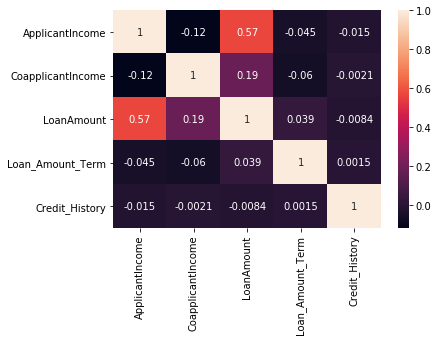

In [8]:
# correlation of numerical variables 

correlation = df.corr()

sn.heatmap(correlation, annot = True)

In [9]:
# we can see from the correlation matrix that there is a correlation between the loan amount and applicant income.
# there is also another intersting observation : there is no correlation between the applicant income and the credit history. 

In [10]:
# to seperate columns with obj dtype 

obj_cols = [*df.select_dtypes('object').columns]
obj_cols.remove('Loan_Status')

In [11]:
# checking the obj_cols list 

obj_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

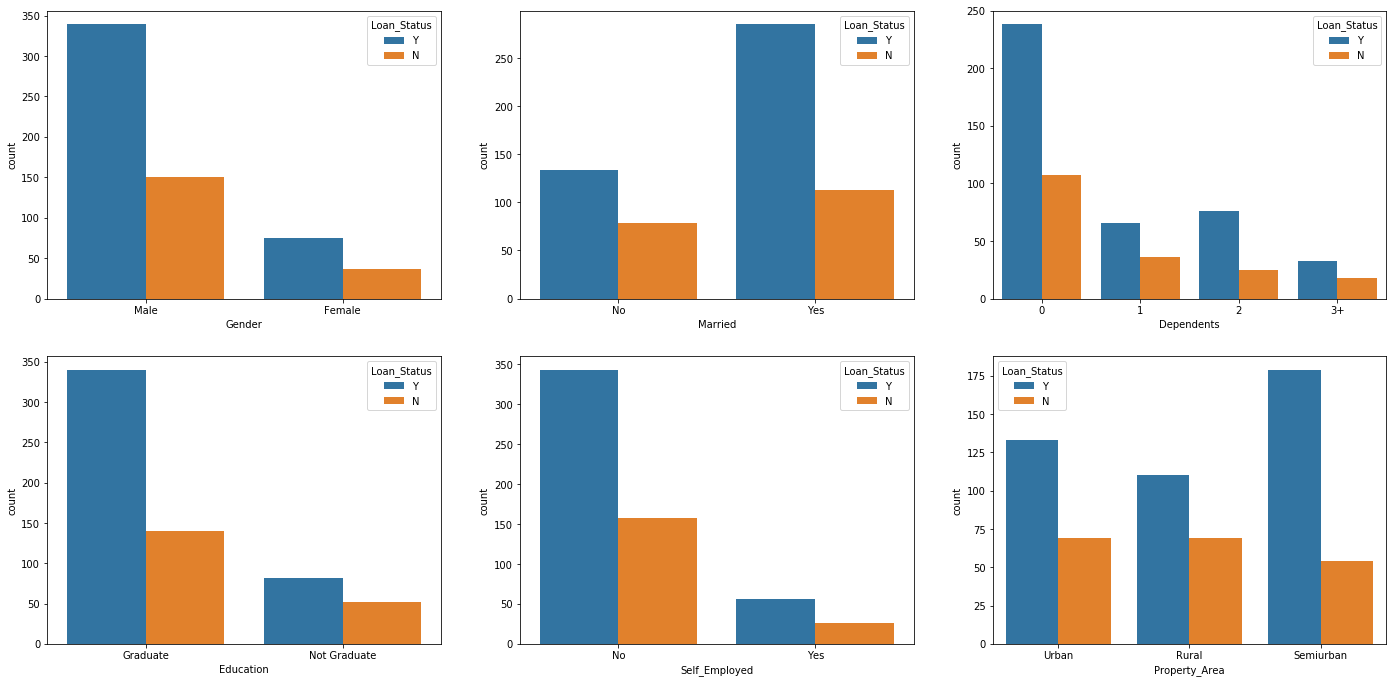

In [12]:
plt.figure(figsize =(24,18))

for idx,cols in enumerate(obj_cols):
    plt.subplot(3,3,idx+1)
    sn.countplot(cols, data=df, hue='Loan_Status')

In [13]:
# Unmarried people having higher proportion of rejection of loan
# Non graduates having more rejection of loan 
# Semi urban has the highest loan approval proportion

In [14]:
# to seperate integer and float dtypes columns from the data

num_cols = [*df.select_dtypes(['Int64','Float64']).columns]

In [15]:
# checking the list num_cols

num_cols

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [16]:
# as loan amount term and credit history are not continuous variables ; it has to be dropped form the list 

num_cols.remove('Loan_Amount_Term')
num_cols.remove('Credit_History')

In [17]:
# checking the num cols list again 

num_cols

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

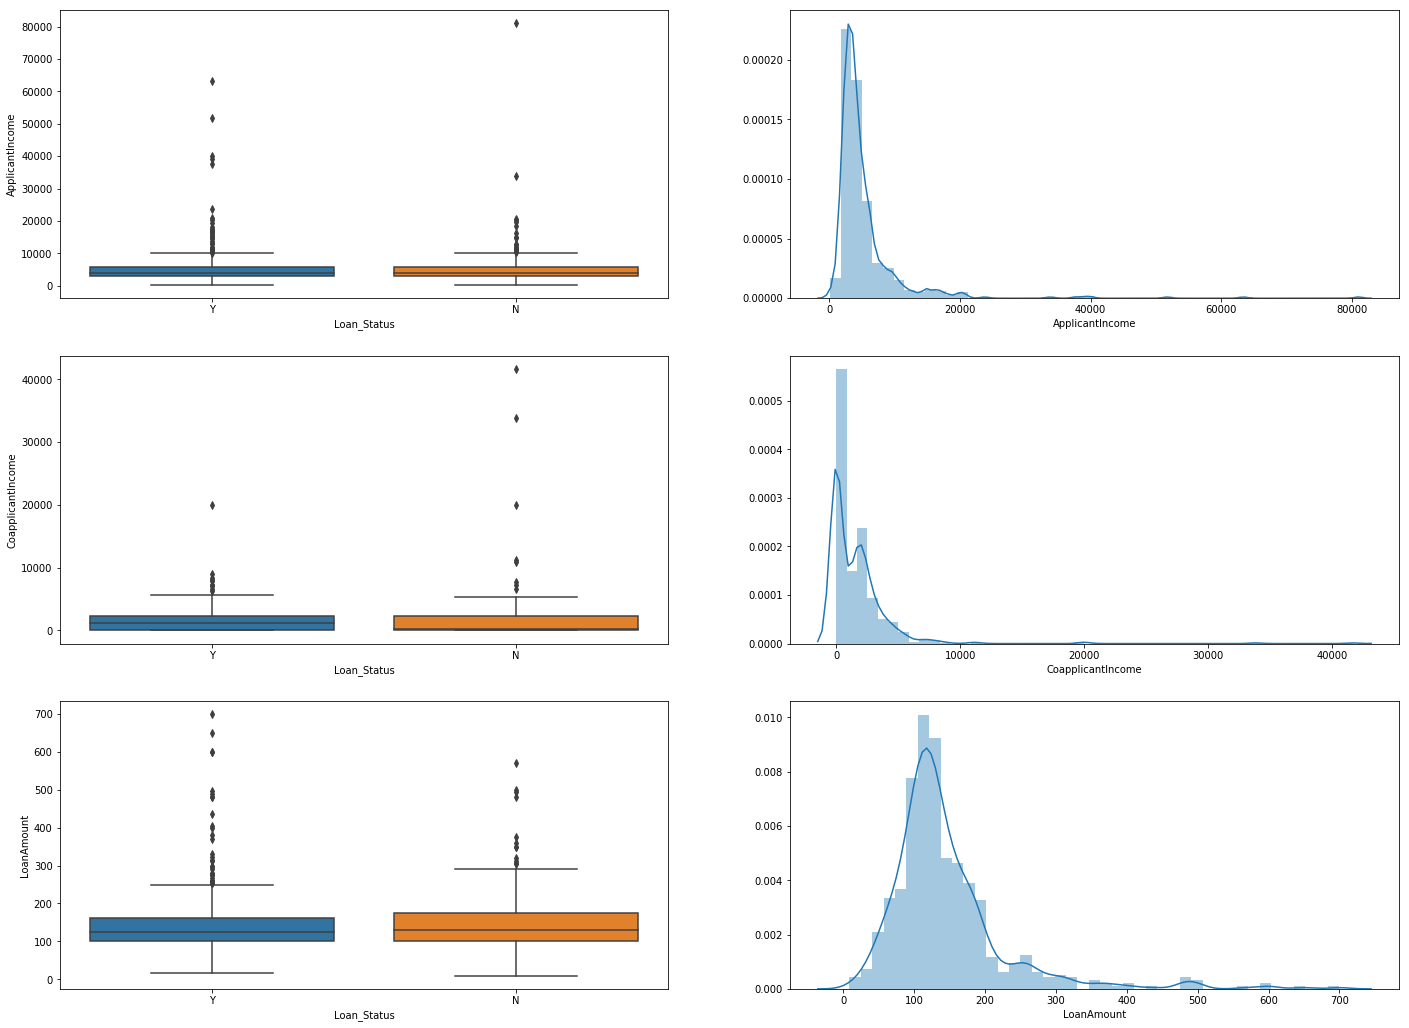

In [18]:
# plotting continous variables 

plt.figure(figsize=(24,18))
count=1

for cols in num_cols:
    plt.subplot(3,2,count)
    sn.boxplot(x='Loan_Status',y=cols, data=df)
    count+=1
    plt.subplot(3,2,count)
    sn.distplot(df.loc[df[cols].notna(),cols])
    count+=1

In [19]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [20]:
df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [21]:
df.Loan_Status.replace({'Y': 0, 'N': 1},inplace=True)

In [22]:
df['Loan_Status'] = df.Loan_Status.astype(int)

In [23]:
dummies = pd.get_dummies(df, drop_first = True)

In [24]:
SimImp = SimpleImputer()

train = pd.DataFrame(SimImp.fit_transform(dummies),columns=dummies.columns)

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
ApplicantIncome            614 non-null float64
CoapplicantIncome          614 non-null float64
LoanAmount                 614 non-null float64
Loan_Amount_Term           614 non-null float64
Credit_History             614 non-null float64
Loan_Status                614 non-null float64
Gender_Male                614 non-null float64
Married_Yes                614 non-null float64
Dependents_1               614 non-null float64
Dependents_2               614 non-null float64
Dependents_3+              614 non-null float64
Education_Not Graduate     614 non-null float64
Self_Employed_Yes          614 non-null float64
Property_Area_Semiurban    614 non-null float64
Property_Area_Urban        614 non-null float64
dtypes: float64(15)
memory usage: 72.0 KB


In [26]:
train.sample(5)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
275,2750.0,1842.0,115.0,360.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
52,4230.0,0.0,112.0,360.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
201,4923.0,0.0,166.0,360.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
222,2971.0,2791.0,144.0,360.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
243,6250.0,1300.0,108.0,360.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


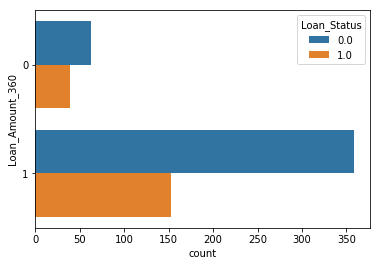

In [27]:
# making the loan amount term column as binary

train['Loan_Amount_360']=np.where(train.Loan_Amount_Term==360,1,0)
sn.countplot(y='Loan_Amount_360',data=train,hue='Loan_Status')

# we can see that with loan amount 360 being 0 more loan applications are rejected.

In [28]:
# Dropping the Loan_Amount_Term column as we have added a new feature representing the same

train.drop('Loan_Amount_Term',inplace=True,axis=1)

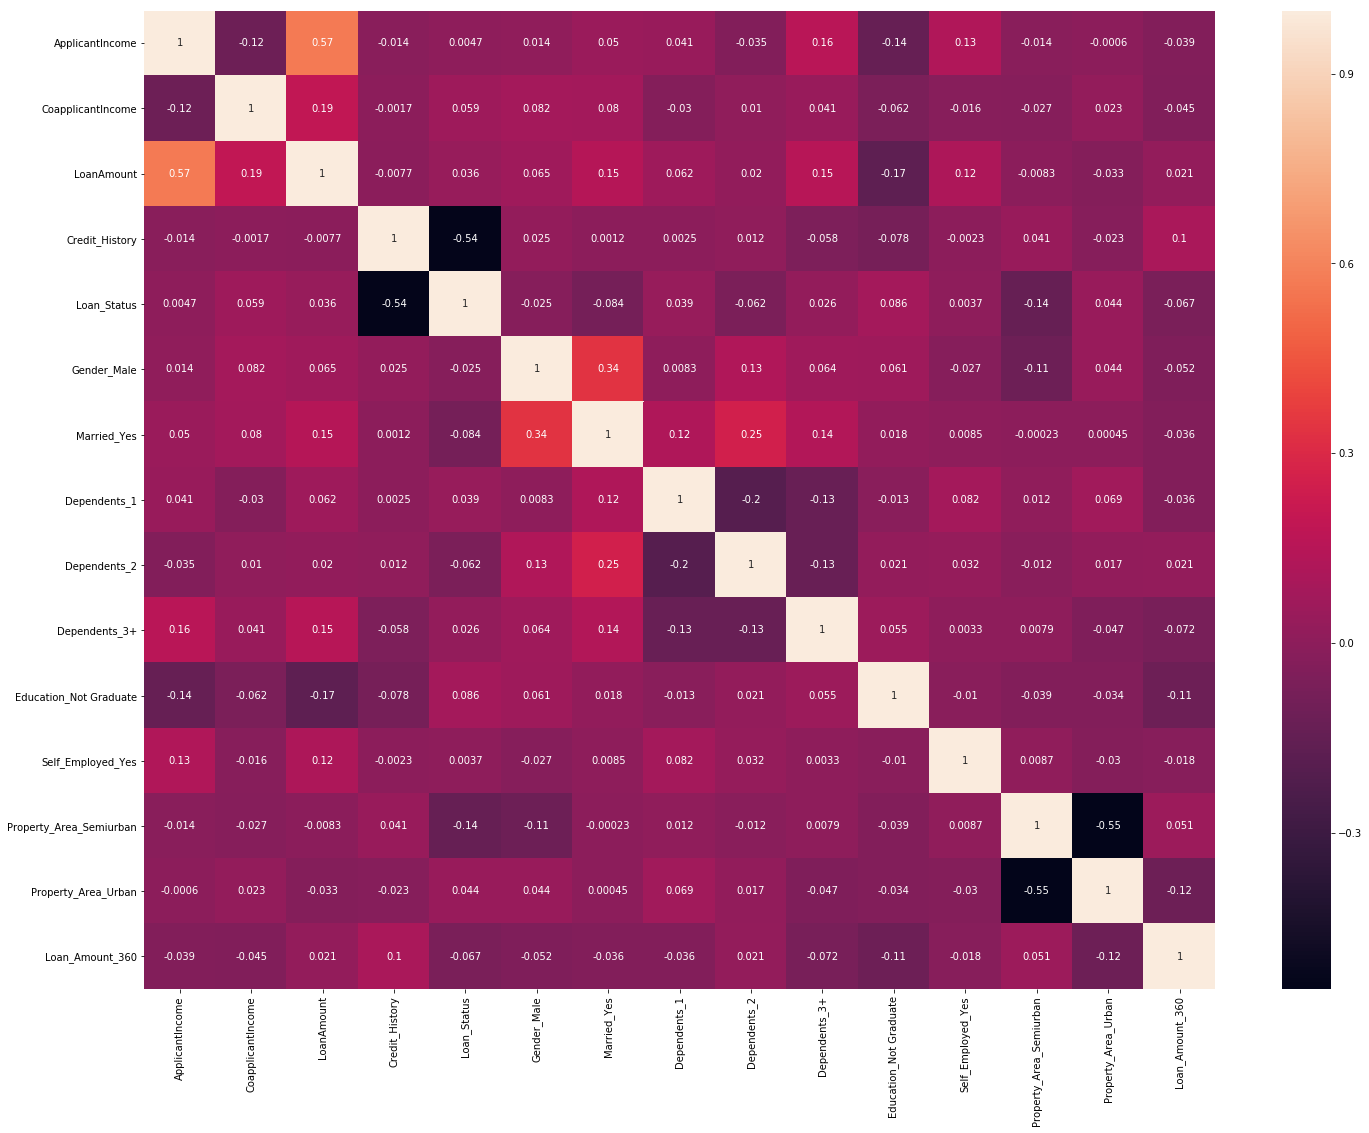

In [29]:
# to check the correlation between all the variables to draw new insights

correlationt = train.corr()
plt.figure(figsize=(24,18))
sn.heatmap(correlationt, annot = True)

In [30]:
# we can see that there is a high correlation between credit history and loan status 

In [31]:
#Creating train and test set for modelling

X,Y = train.drop('Loan_Status',axis=1),train.Loan_Status
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=123,stratify=Y)

In [32]:
## Modelling

In [33]:
#Logistic Regression 

logit = LogisticRegressionCV()
logit.fit(X_train,Y_train)

logit_pred = logit.predict(X_test)
print(accuracy_score(Y_test,logit_pred))

confusion_matrix(Y_test,logit_pred)

C:\Users\anton\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\anton\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.7723577235772358


array([[80,  5],
       [23, 15]], dtype=int64)

In [34]:
#Random Forest 

ranfor = RandomForestClassifier(n_estimators = 100, bootstrap = True, max_features = 'sqrt')

ranfor.fit(X_train,Y_train)

ranfor_pred = ranfor.predict(X_test)
print(accuracy_score(Y_test,ranfor_pred))

confusion_matrix(Y_test,ranfor_pred)

0.7723577235772358


array([[81,  4],
       [24, 14]], dtype=int64)

In [35]:
#KNN Neighbours

KNN_clas = KNeighborsClassifier(n_neighbors=8)

KNN_clas.fit(X_train,Y_train)

KNN_pred = KNN_clas.predict(X_test)
print(accuracy_score(Y_test,KNN_pred))

confusion_matrix(Y_test,KNN_pred)

0.6829268292682927


array([[82,  3],
       [36,  2]], dtype=int64)

In [36]:
#Naive Bayes

gnb = GaussianNB()

gnb.fit(X_train,Y_train)

gnb_pred = gnb.predict(X_test)
print(accuracy_score(Y_test,gnb_pred))

confusion_matrix(Y_test,gnb_pred)

0.7642276422764228


array([[81,  4],
       [25, 13]], dtype=int64)

In [37]:
# Random Forest gives the best accuracy in terms of percentage 
# Other reasons why Random Forest outperforms other algorithms. 

# the important metrics in this problem statement is approving of bad loans
# random forest has the least false positive (i.e approving bad loans) and the highest true negative(i.e identifying most loans)